In [2]:
import numpy as no
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# reading the csv file
dataset=pd.read_csv('Data\stud.csv')

In [4]:
dataset

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
# we will check for the null value count
dataset.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [7]:
dataset.duplicated().sum()

np.int64(0)

In [8]:
l1=dataset.groupby('parental_level_of_education')[['reading_score','math_score','writing_score']].sum().reset_index()
l1

,parental_level_of_education,reading_score,math_score,writing_score
0,associate's degree,15746,15070,15517
1,bachelor's degree,8614,8188,8659
2,high school,12682,12179,12240
3,master's degree,4447,4115,4465
4,some college,15698,15171,15558
5,some high school,11982,11366,11615


In [9]:
l1[['math_score','reading_score','writing_score']][5:6]

,math_score,reading_score,writing_score
5,11366,11982,11615


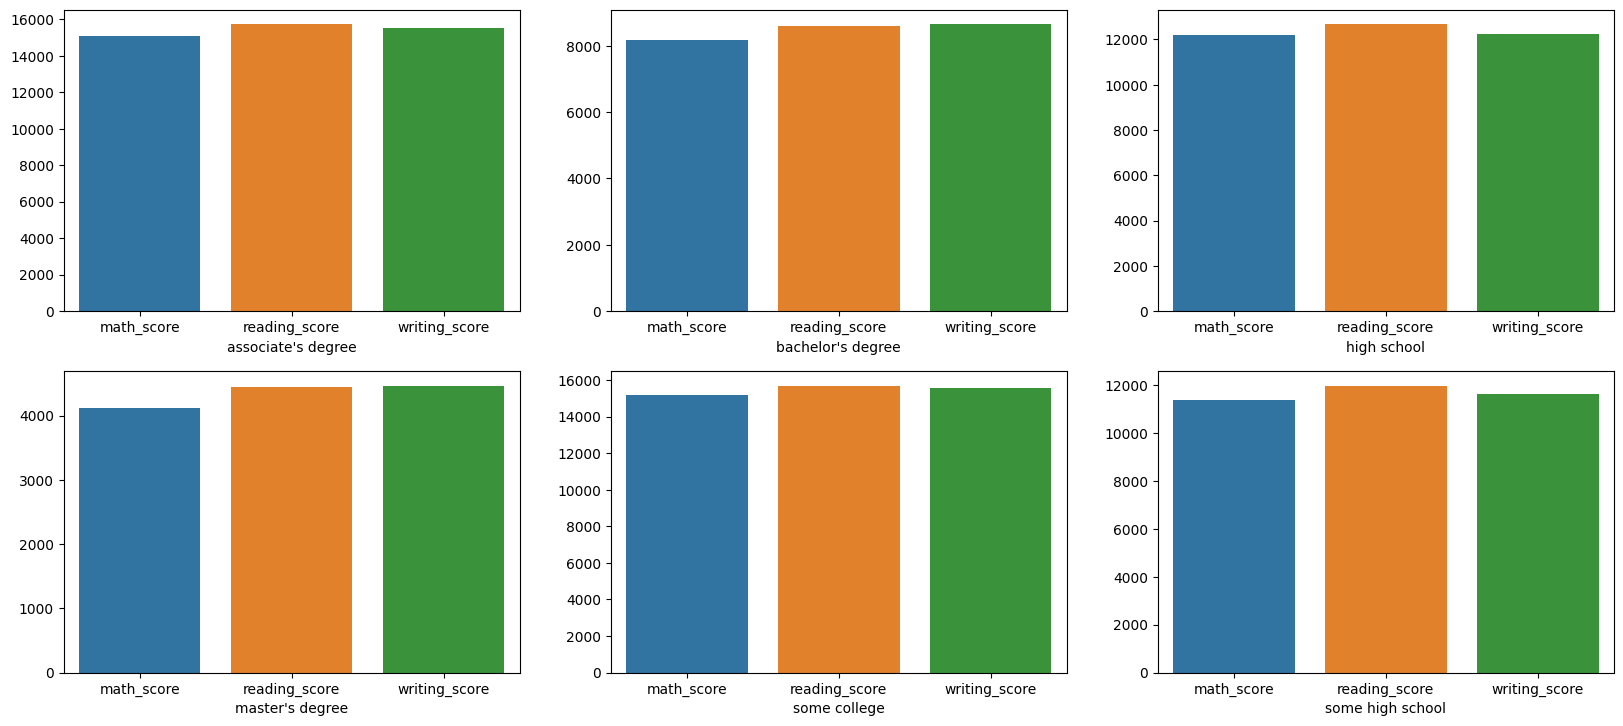

In [10]:
plt.figure(figsize=(20,18))

for i in range(len(l1['parental_level_of_education'])):
    plt.subplot(4,3,i+1)
    plt.xlabel(l1['parental_level_of_education'][i])
    sns.barplot(l1[['math_score','reading_score','writing_score']][i:i+1])

In [129]:
l2=dataset.groupby('gender')[['reading_score','math_score','writing_score']].sum().reset_index()
l2

,gender,reading_score,math_score,writing_score
0,female,37611,32962,37538
1,male,31558,33127,30516


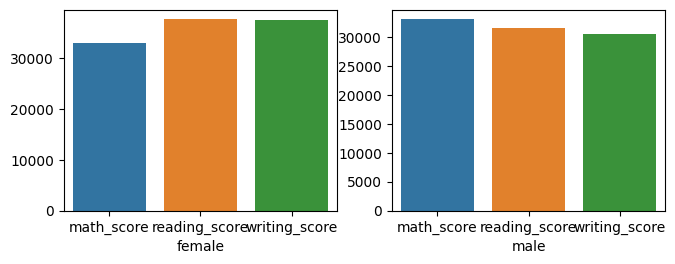

In [ ]:
plt.figure(figsize=(12,12))
for i in range(len(l2['gender'])):
    plt.subplot(4,3,i+1)
    plt.xlabel(l2['gender'][i])
    sns.barplot(l2[['math_score','reading_score','writing_score']][i:i+1])

#only  math_score of male is more than that of female othe score are less than the students

In [17]:
l3=pd.DataFrame(dataset.groupby(['gender','test_preparation_course'])['test_preparation_course'].count())

In [ ]:
l4=l3['test_preparation_course'].reset_index(name='Number')

l4['Number'][1:2]



1    334
Name: Number, dtype: int64

<Axes: xlabel='Number', ylabel='test_preparation_course'>

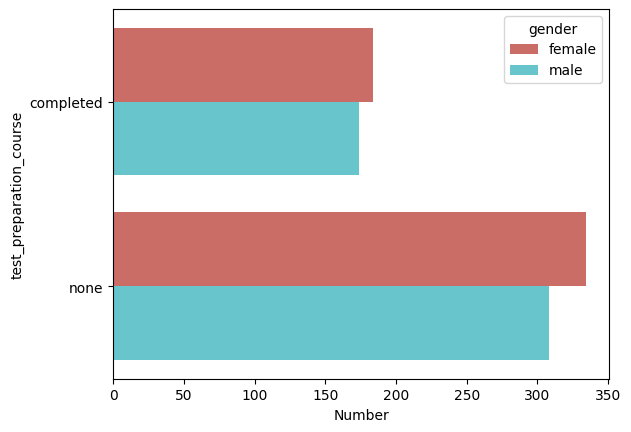

In [ ]:

sns.barplot(y=l4['test_preparation_course'],x=l4['Number'],hue=l4['gender'],palette='hls',orient='h')

# there are the  more no of females  that have not compted the course as compared to males
# also thee are more no of females who have completed the course



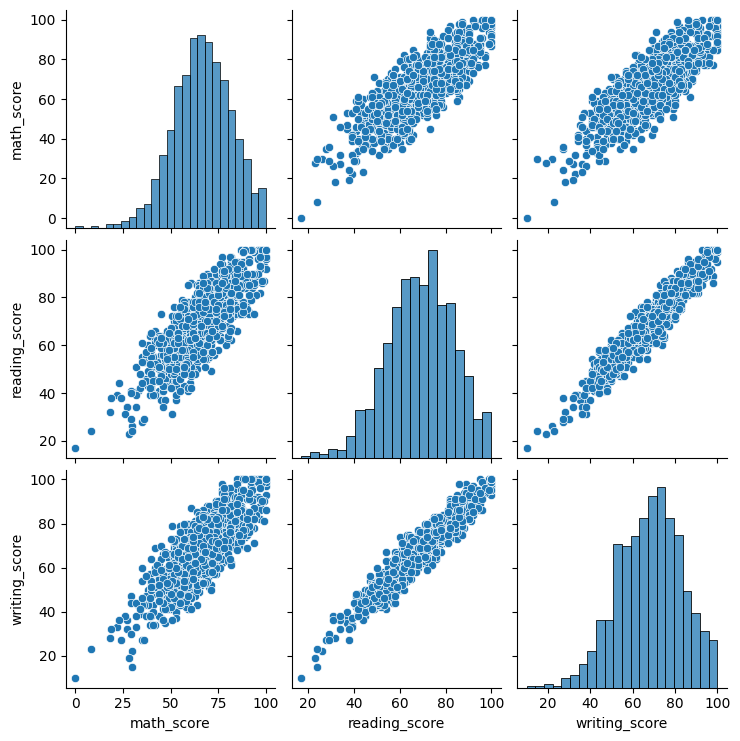

In [38]:
sns.pairplot(dataset,kind='scatter')

In [93]:
l5=dataset.groupby('lunch')[['math_score','reading_score','writing_score']].sum().reset_index()

l5

,lunch,math_score,reading_score,writing_score
0,free/reduced,20917,22952,22373
1,standard,45172,46217,45681


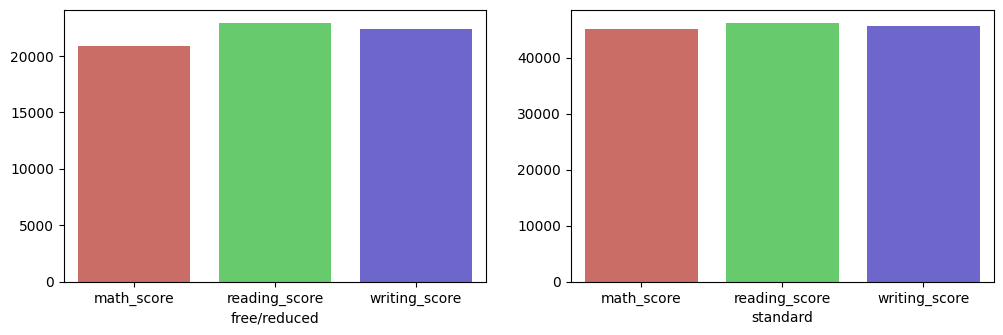

In [ ]:
plt.figure(figsize=(12,12))
for i ,j in enumerate(l5['lunch']):
    plt.subplot(3,2,i+1)
    plt.xlabel(j)
    sns.barplot(l5[['math_score','reading_score','writing_score']][i:i+1],palette='hls')


    # students whio eate the standar have scored more tan the students who eate the free food 

([<matplotlib.patches.Wedge at 0x203c58c9150>,
 [Text(-0.4746018502673304, 0.9923472596439347, 'none'),
  Text(0.5177470514541854, -1.0825608485025207, 'completed')],
 [Text(-0.25887373650945295, 0.5412803234421462, '64.2%'),
  Text(0.3020191133482748, -0.6314938282931369, '35.8%')])

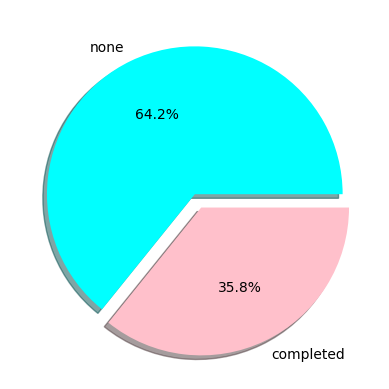

In [ ]:
# pie chart showing the precentage of the students that have done with the prepration 
labels=dataset['test_preparation_course'].unique()

precentage=list(dataset['test_preparation_course'].value_counts())
new_per=[i/sum(precentage) for i in  precentage]

plt.pie(x=new_per,labels=labels,autopct="%1.1f%%",colors=['cyan','pink'],explode=[0,0.1],shadow=True)


# only 35% of studnmets have completed the test_prepration course and remainmaing 65% havent complted the course 



In [121]:
dataset['Total_marks']=dataset['math_score']+dataset['writing_score']+dataset['reading_score']

dataset.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_marks
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


<Axes: xlabel='gender', ylabel='Total_marks'>

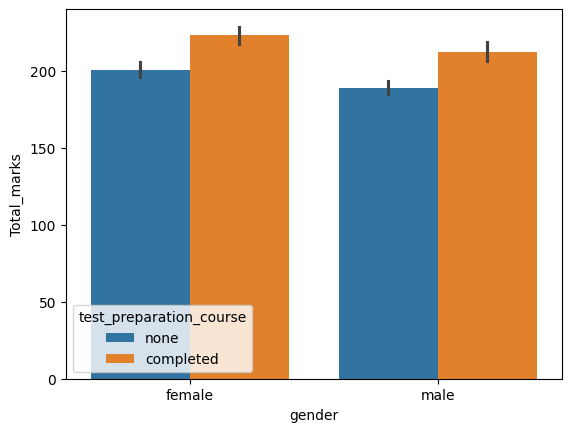

In [ ]:
sns.barplot(x=dataset['gender'],y=dataset['Total_marks'],hue=dataset['test_preparation_course'])

# female studnets have scored the more no of marks  than the male studnets

<Axes: xlabel='race_ethnicity', ylabel='Total_marks'>

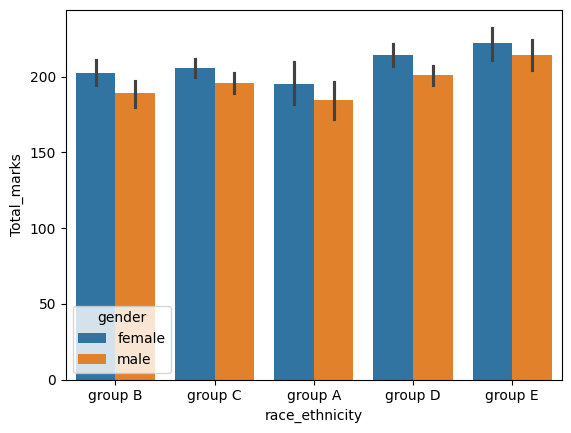

In [ ]:
sns.barplot(x=dataset['race_ethnicity'],y=dataset['Total_marks'],hue=dataset['gender'])

In [ ]:
# insight students with thr race_ethmcity of group F have scored highest marks 


dataset['parental_level_of_education'].unique()


array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

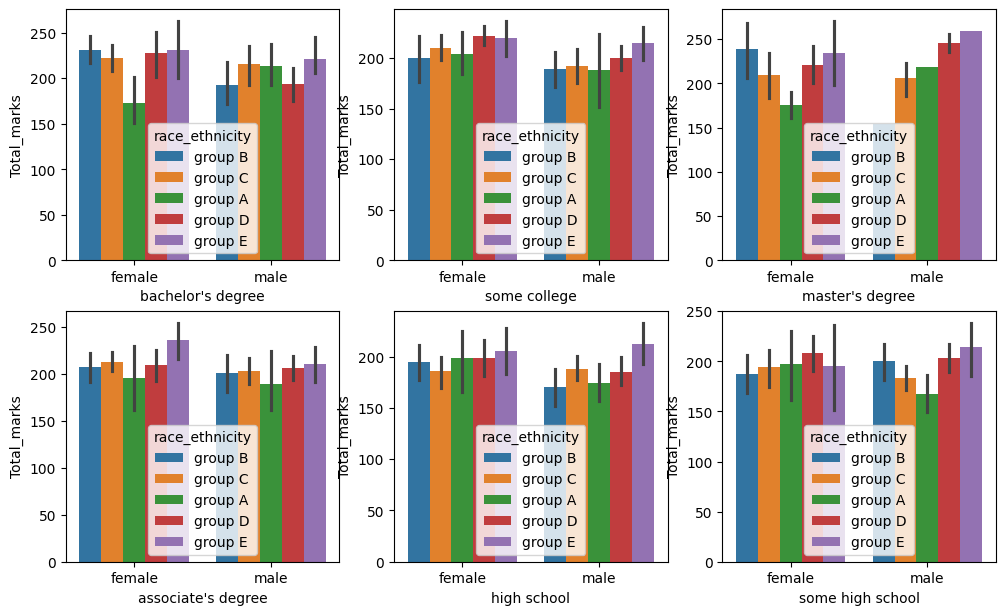

In [161]:
plt.figure(figsize=(12,15))
for i ,j in enumerate(dataset["parental_level_of_education"].unique()):
    plt.subplot(4,3,i+1)
    plt.xlabel(j)
    sns.barplot(x=dataset['gender'],y=dataset['Total_marks'][dataset['parental_level_of_education']==j],hue=dataset['race_ethnicity'])

C:\Users\HP\AppData\Local\Temp\ipykernel_17136\582930091.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
C:\Users\HP\AppData\Local\Temp\ipykernel_17136\582930091.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
C:\Users\HP\AppData\Local\Temp\ipykernel_17136\582930091.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.

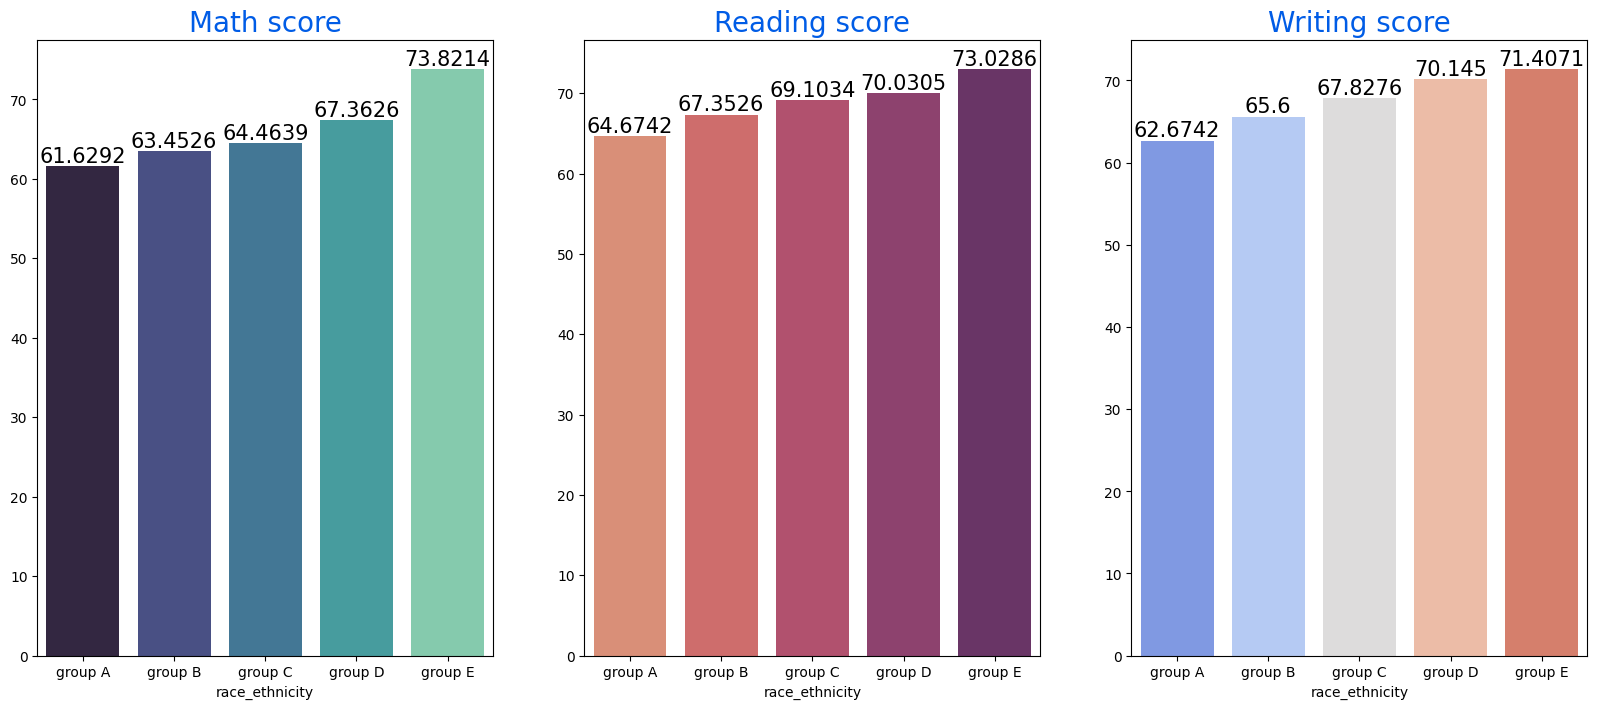

In [ ]:
Group_data2=dataset.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)